# Cleaning openfoodfacts dataset
#### by Jérôme d'Harveng

<a id='table'></a>
## Table of Contents
<ul>
<li><a href="#gathering">Gathering the data</a></li>
<li><a href="#assessing">Assessing</a></li>
<li><a href="#cleaning">Cleaning</a></li>
<li><a href="#exporting">Exporting to csv</a></li>
</ul>

<a id='gathering'></a>
## Gathering 

In [13]:
# import of necessary libraries
import pandas as pd
import numpy as np

In [14]:
open_food_fct = pd.read_csv('fr.openfoodfacts.org.products.csv', sep="\t", encoding='utf_8', low_memory=False)

<a id='assessing'></a>
## Assessing

### General info

In [15]:
# size of dataset
open_food_fct.shape

(320772, 162)

In [16]:
open_food_fct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


### Visual inspection

In [18]:
# some visual inspections
open_food_fct.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [19]:
open_food_fct.sample(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
65988,0055415485751,http://world-fr.openfoodfacts.org/produit/0055...,usda-ndb-import,1489133724,2017-03-10T08:15:24Z,1489133724,2017-03-10T08:15:24Z,Grand Truffles,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,26.0,26.0,NaN,NaN
241326,3564700152829,http://world-fr.openfoodfacts.org/produit/3564...,jteplitxky,1368638849,2013-05-15T17:27:29Z,1485288348,2017-01-24T20:05:48Z,"Déli'light aux Fruits (0 % MG, 0 % sucres ajou...",Yaourt maigre à 0 % MG avec édulcorants aux fr...,2 kg (16 pots) - [2 x (8 x 125 g)],...,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,-2.0,NaN,NaN
95618,0077975088722,http://world-fr.openfoodfacts.org/produit/0077...,usda-ndb-import,1489071721,2017-03-09T15:02:01Z,1489071721,2017-03-09T15:02:01Z,"Eatsmart, Sea Salt Garden Veggie",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN


#### Comments:
- there are way too many columns (162) to work on 
    * First step will be to select a first batch of columns on which we'll do the cleaning
- let's focus on the goal of Lamarmite: producing healthy recipes
- So first ideas on healthy food based on article of Hercberg
    * vegetables and fruit
    * fish products
    * lower fat, sugar and salt proportions
    * vitamines and minerals
    * lower alcohol
    * lower cholesterol
    
- Following link is interesting to understand the nutrition_grade:
http://fr.openfoodfacts.org/score-nutritionnel-experimental-france


In [20]:
open_food_fct.url[300000]

'http://world-fr.openfoodfacts.org/produit/7730124384115/dulce-de-leche-los-nietitos'

> There a 4 main categories in the dataset:
> - **General information on the product datasheet**
> - **Collection of several tags**
> - **Ingredients and additives contained in products**
> - **Nutritional informations**



> Looking at the final goal of Lamarmite, we'll start by with features of the last category: **Nutritional informations**



In [21]:
info  = ['code','product_name','generic_name','energy_100g','fat_100g',
         'saturated-fat_100g','trans-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g',
         'salt_100g','sodium_100g','vitamin-a_100g','vitamin-d_100g','vitamin-e_100g','vitamin-k_100g',
         'vitamin-c_100g','vitamin-b1_100g','vitamin-b2_100g','vitamin-pp_100g','vitamin-b6_100g','vitamin-b9_100g',
         'vitamin-b12_100g','calcium_100g','iron_100g','magnesium_100g','potassium_100g','phosphorus_100g','zinc_100g','lactose_100g',
         'omega-3-fat_100g','omega-6-fat_100g','omega-9-fat_100g','cholesterol_100g','alcohol_100g','caffeine_100g',
         'fruits-vegetables-nuts_100g','nutrition_grade_fr','nutrition-score-fr_100g','nutrition-score-uk_100g']       

In [22]:
open_food_fct_info = open_food_fct[info]

In [23]:
open_food_fct_info.shape

(320772, 41)

In [24]:
open_food_fct_info.sample(5)

,code,product_name,generic_name,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,...,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,cholesterol_100g,alcohol_100g,caffeine_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr,nutrition-score-fr_100g,nutrition-score-uk_100g
146368,0790429230569,Gummy Fish,NaN,1502.0,0.00,0.00,0.0,97.44,71.79,0.0,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,d,14.0,14.0
88256,0075201007035,"Cousin Willie's, Simply Better, Mauve Popcorn,...",NaN,2243.0,28.57,1.79,0.0,57.14,0.00,10.7,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,d,12.0,12.0
88356,0075278995006,Popcorn Chicken,NaN,946.0,10.71,1.79,0.0,15.48,0.00,0.0,...,NaN,NaN,NaN,0.042,NaN,NaN,NaN,c,3.0,3.0
79588,0072220100167,Bagel Boys Original Premium Bagels,NaN,1134.0,2.35,0.59,0.0,51.76,4.71,2.4,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,b,0.0,0.0
32244,0036632028068,"Activia, Greek Nonfat Yogurt, Blueberry",NaN,364.0,0.00,0.00,0.0,14.00,12.67,0.7,...,NaN,NaN,NaN,0.003,NaN,NaN,NaN,a,-1.0,-1.0


In [27]:
open_food_fct_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 41 columns):
code                           320749 non-null object
product_name                   303010 non-null object
generic_name                   52795 non-null object
energy_100g                    261113 non-null float64
fat_100g                       243891 non-null float64
saturated-fat_100g             229554 non-null float64
trans-fat_100g                 143298 non-null float64
carbohydrates_100g             243588 non-null float64
sugars_100g                    244971 non-null float64
fiber_100g                     200886 non-null float64
proteins_100g                  259922 non-null float64
salt_100g                      255510 non-null float64
sodium_100g                    255463 non-null float64
vitamin-a_100g                 137554 non-null float64
vitamin-d_100g                 7057 non-null float64
vitamin-e_100g                 1340 non-null float64
vitamin-k_100g   

In [28]:
# More in depth analysis of null values
open_food_fct_info.isnull().sum()

code                               23
product_name                    17762
generic_name                   267977
energy_100g                     59659
fat_100g                        76881
saturated-fat_100g              91218
trans-fat_100g                 177474
carbohydrates_100g              77184
sugars_100g                     75801
fiber_100g                     119886
proteins_100g                   60850
salt_100g                       65262
sodium_100g                     65309
vitamin-a_100g                 183218
vitamin-d_100g                 313715
vitamin-e_100g                 319432
vitamin-k_100g                 319854
vitamin-c_100g                 179905
vitamin-b1_100g                309618
vitamin-b2_100g                309957
vitamin-pp_100g                309043
vitamin-b6_100g                313988
vitamin-b9_100g                315532
vitamin-b12_100g               315472
calcium_100g                   179722
iron_100g                      180310
magnesium_10

##### Are there some duplicated lines (basically on "code")?

In [29]:
open_food_fct_info.duplicated().sum()

0

In [30]:
# duplicated nutriments "codes"
open_food_fct_info["code"].duplicated().sum()

22

In [31]:
open_food_fct_info[open_food_fct_info["code"].duplicated()].code.sample(5)

189250    NaN
189109    NaN
189406    NaN
189103    NaN
189417    NaN
Name: code, dtype: object

> There are no duplicated codes, only null-values that will be treated later on

#### First observations:
>- Total amount of products : 320772
>- Some column names mix "-" and "_" => this could lead to problems for the use of some cleaning functions
>- **Missing values** => null values:
    * code: 23 null-values => those lines will be deleted
    * product_name : has 17762 null-values  
        * 5,5% of the products don't have a product_name
        * => as the product_name is essential in identifying it, we'll decide to delete those lines
    * generic_name : has 267977 nul-values  
        * 83.5% of them 
        * too many to delete or replace by other aggregate value as mean for example => we'll decide to leave this attribute out of the study
    * for the attributes ending by "_100g" 
        * except nutrition_score_fr_100g and nutrition_score_uk_100g,
        * we'll assume that missing value correspond to the fact that the nutriment isn't present in the product
        * So we'll replace the missing values by 0
    * replace the missing values from "nutrition-score-fr_100g " and "nutrition-score-uk_100g" 
    * replace the missing values from "nutrition_grade_fr" by the letter corresponding to to median score (cfr previous point)
>
>
>- **Wrong values**:
    * for the nutriments with _100g, remove the values < 0 gr or >100gr
    * Delete the lines containing more than 0.8g of Iron, Calcium, Magnesium, Potassium, Zinc or Vitamines 
    * Double coherence of nutrition_grade vs nutrition_score_fr based on https://fr.openfoodfacts.org/nutriscore
>  
>
>- **Types**: 
    * nutrition-score_fr_100g and nutrition-score_uk_100g are "floats" and should be "int"
    * nutrition_grade_fr is a String => should be an Ordered Categorical variable
    * additives_n and ingredients_from_palm_oil_n : have float type and should be int

<a id='cleaning'></a>
## Cleaning
<a href="#table">Back to table of content</a>


### Starting by making a copy

In [34]:
# to avoid modifying orginal dataset
nutri_data = open_food_fct.copy()

#### 1. Keep important columns 

##### Define

Regarding to the comments of the assessement phase, keep relevant columns

##### Code

In [35]:
study_columns  = ['code','product_name','energy_100g','fat_100g', 'saturated-fat_100g','trans-fat_100g','carbohydrates_100g','sugars_100g',
         'fiber_100g','proteins_100g','salt_100g','sodium_100g','vitamin-a_100g','vitamin-d_100g','vitamin-e_100g',
         'vitamin-k_100g','vitamin-c_100g','vitamin-b1_100g','vitamin-b2_100g','vitamin-pp_100g','vitamin-b6_100g',
         'vitamin-b9_100g','vitamin-b12_100g','calcium_100g','iron_100g','magnesium_100g','potassium_100g','zinc_100g',
         'lactose_100g','omega-3-fat_100g','omega-6-fat_100g','omega-9-fat_100g','cholesterol_100g',
         'alcohol_100g','caffeine_100g','fruits-vegetables-nuts_100g','nutrition_grade_fr','nutrition-score-fr_100g',
         'nutrition-score-uk_100g']       


In [36]:
nutri_data = nutri_data[study_columns]

##### Test

In [37]:
nutri_data.shape

(320772, 39)

In [38]:
nutri_data.sample(3)

,code,product_name,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,...,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,cholesterol_100g,alcohol_100g,caffeine_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr,nutrition-score-fr_100g,nutrition-score-uk_100g
299947,7706642005047,Trocillo Sabor Pollo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176158,2000000031521,Pizza boeuf-pepperoni,1054.0,10.0,NaN,NaN,30.0,NaN,2.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172426,0892805005447,Chicken Brine Herbs De Provence Brine Mix,79.0,0.0,0.0,0.0,3.7,3.7,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,c,10.0,10.0


#### 2. Replace "-" in column names by "_"

#### Define

To have correct working of pandas functions, it's better to have column name with "_" instead of "-"

#### Code

In [39]:
nutri_data.columns = nutri_data.columns.str.replace('-','_')

#### Test

In [40]:
nutri_data.columns

Index(['code', 'product_name', 'energy_100g', 'fat_100g', 'saturated_fat_100g',
       'trans_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin_a_100g',
       'vitamin_d_100g', 'vitamin_e_100g', 'vitamin_k_100g', 'vitamin_c_100g',
       'vitamin_b1_100g', 'vitamin_b2_100g', 'vitamin_pp_100g',
       'vitamin_b6_100g', 'vitamin_b9_100g', 'vitamin_b12_100g',
       'calcium_100g', 'iron_100g', 'magnesium_100g', 'potassium_100g',
       'zinc_100g', 'lactose_100g', 'omega_3_fat_100g', 'omega_6_fat_100g',
       'omega_9_fat_100g', 'cholesterol_100g', 'alcohol_100g', 'caffeine_100g',
       'fruits_vegetables_nuts_100g', 'nutrition_grade_fr',
       'nutrition_score_fr_100g', 'nutrition_score_uk_100g'],
      dtype='object')

#### 3. Missing values for "code"

#### Define

Delete the line of the dataframe where "code" is null

#### Code

In [41]:
nutri_data = nutri_data.dropna(subset=['code'])

#### Test

In [42]:
nutri_data.code.isnull().sum()

0

In [43]:
# doublecheck for duplicates
nutri_data["code"].duplicated().sum()

0

#### 4. Missing values for "product_name "

##### Define

Delete the lines of the dataframe where "product_name " is null

##### Code

In [44]:
nutri_data = nutri_data.dropna(subset=['product_name'])

##### Test

In [45]:
nutri_data.product_name.isnull().sum()

0

#### 5. Replace null-values for the terms ending by "_100g"

##### Define

Replace the null_values of the terms ending by "_100g" with 0

##### Code

In [46]:
nutri_data_headers = nutri_data.columns.values.tolist()

In [47]:
terms_end_100g = [x for x in nutri_data_headers if (x.endswith('_100g') and x not in (['nutrition_score_fr_100g', 'nutrition_score_uk_100g']))]

In [49]:
nutri_data[terms_end_100g] = nutri_data[terms_end_100g].fillna(value=0)

##### Test

In [50]:
nutri_data[terms_end_100g].sample(3)

,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,...,potassium_100g,zinc_100g,lactose_100g,omega_3_fat_100g,omega_6_fat_100g,omega_9_fat_100g,cholesterol_100g,alcohol_100g,caffeine_100g,fruits_vegetables_nuts_100g
69324,1079.0,22.58,4.84,0.0,9.68,6.45,0.0,6.45,2.21234,0.871000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.065,0.0,0.0,0.0
238950,1186.0,2.10,0.50,0.0,53.00,1.80,2.7,11.00,0.04000,0.015748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
136909,1343.0,0.00,0.00,0.0,82.14,75.00,0.0,0.00,0.04572,0.018000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


In [51]:
nutri_data[terms_end_100g].isnull().sum()

energy_100g                    0
fat_100g                       0
saturated_fat_100g             0
trans_fat_100g                 0
carbohydrates_100g             0
sugars_100g                    0
fiber_100g                     0
proteins_100g                  0
salt_100g                      0
sodium_100g                    0
vitamin_a_100g                 0
vitamin_d_100g                 0
vitamin_e_100g                 0
vitamin_k_100g                 0
vitamin_c_100g                 0
vitamin_b1_100g                0
vitamin_b2_100g                0
vitamin_pp_100g                0
vitamin_b6_100g                0
vitamin_b9_100g                0
vitamin_b12_100g               0
calcium_100g                   0
iron_100g                      0
magnesium_100g                 0
potassium_100g                 0
zinc_100g                      0
lactose_100g                   0
omega_3_fat_100g               0
omega_6_fat_100g               0
omega_9_fat_100g               0
cholestero

#### 6. replace the null_values of nutrition-score-fr_100g and nutrition-score-uk_100g

##### Define

Replace those null_values by the median value

##### Code

In [52]:
# find amount of NAN for grade = NAN not corresponding with score = NAN
nutri_data.query('nutrition_grade_fr.isnull() & (~nutrition_score_fr_100g.isnull()| ~nutrition_score_uk_100g.isnull())')

,code,product_name,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,...,omega_3_fat_100g,omega_6_fat_100g,omega_9_fat_100g,cholesterol_100g,alcohol_100g,caffeine_100g,fruits_vegetables_nuts_100g,nutrition_grade_fr,nutrition_score_fr_100g,nutrition_score_uk_100g


In [53]:
# find the median for both scores
median_score = list(nutri_data[["nutrition_score_fr_100g","nutrition_score_uk_100g"]].quantile(0.5))
print(median_score)

[10.0, 9.0]


In [54]:
nutri_data.nutrition_score_fr_100g = nutri_data.nutrition_score_fr_100g.fillna(value=median_score[0])

In [55]:
nutri_data.nutrition_score_uk_100g = nutri_data.nutrition_score_uk_100g.fillna(value=median_score[1])

##### Test

In [56]:
nutri_data[["nutrition_score_fr_100g","nutrition_score_uk_100g"]].isnull().sum()

nutrition_score_fr_100g    0
nutrition_score_uk_100g    0
dtype: int64

#### 7. Replace the null_values of "nutrition_grade_fr "

##### Define

Replace the missing values in "nutrition_grade_fr" by the corresponding letter to nutrition_score_fr_100gr = 10
on https://fr.openfoodfacts.org/nutriscore , for solid aliments = "c". **In order to keep track of the places of the null values in this case, we'll add a new column name "nulls_grade_fr"**

##### Code

In [57]:
nutri_data['nulls_grade_fr'] = np.where(nutri_data['nutrition_grade_fr'].isnull(),1,0)

In [58]:
nutri_data.nutrition_grade_fr = nutri_data.nutrition_grade_fr.fillna(value="c")

##### Test

In [59]:
nutri_data.query('nulls_grade_fr==1').nulls_grade_fr.count()

84524

In [60]:
nutri_data.nutrition_grade_fr.sample(3)

140798    b
196469    a
207249    c
Name: nutrition_grade_fr, dtype: object

In [61]:
nutri_data.nutrition_grade_fr.isnull().sum()

0

In [62]:
nutri_data.nutrition_grade_fr.value_counts()

c    129484
d     62019
e     42377
a     35297
b     33810
Name: nutrition_grade_fr, dtype: int64

#### 8. Convert type of "nutrition_grade_fr" 

##### Define

Convert type of nutrition_grade_fr to an ordered categorical type (from a to e, a being the healthiest)

##### Code

In [63]:
# indicating order by decreasing health
scores = ['a','b','c','d','e']
ordered_score = pd.api.types.CategoricalDtype(ordered = True,categories = scores)
nutri_data['nutrition_grade_fr'] = nutri_data['nutrition_grade_fr'].astype(ordered_score)

##### Test

In [64]:
nutri_data.nutrition_grade_fr.dtypes

CategoricalDtype(categories=['a', 'b', 'c', 'd', 'e'], ordered=True)

#### 9. change type of nutrition-score-fr_100g and nutrition-score-uk_100g

##### Define

Change the type from float to int

##### Code

In [65]:
nutri_data[["nutrition_score_fr_100g","nutrition_score_uk_100g"]]=\
nutri_data[["nutrition_score_fr_100g","nutrition_score_uk_100g"]].astype('int')

##### Test

In [66]:
nutri_data[["nutrition_score_fr_100g","nutrition_score_uk_100g"]].dtypes

nutrition_score_fr_100g    int64
nutrition_score_uk_100g    int64
dtype: object

### Are there some non-valid data and/or Outliers ?

In [67]:
# import of necessary libraries
import matplotlib.pyplot as plt
import seaborn as sb

> **Let's have a look at the outliers through Boxplots**
>
> Throughout this analysis we'll define outliners as measurements being above the Q3 + 1.5*(Q3-Q1)

In [68]:
nutri_score = ['nutrition_score_fr_100g','nutrition_score_uk_100g']

In [69]:
nutri_data[nutri_score].describe()

,nutrition_score_fr_100g,nutrition_score_uk_100g
count,302987.000000,302987.000000
mean,9.388366,9.032018
std,7.696277,7.795913
min,-15.000000,-15.000000
25%,3.000000,3.000000
50%,10.000000,9.000000
75%,14.000000,14.000000
max,40.000000,40.000000


In [70]:
nutri_summary = ['energy_100g', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g', 'carbohydrates_100g',
                 'sugars_100g', 'fiber_100g','proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin_a_100g', 
                 'vitamin_d_100g', 'vitamin_e_100g', 'vitamin_k_100g','vitamin_c_100g', 'vitamin_b1_100g', 
                 'vitamin_b2_100g', 'vitamin_pp_100g', 'vitamin_b6_100g', 'vitamin_b9_100g', 'vitamin_b12_100g',
                 'calcium_100g','iron_100g','magnesium_100g','potassium_100g','zinc_100g', 
                 'fruits_vegetables_nuts_100g']

In [95]:
nutri_summary_mg = nutri_summary[10:-1]

In [97]:
nutri_data[nutri_summary].describe()

,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,...,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,vitamin_b12_100g,calcium_100g,iron_100g,magnesium_100g,potassium_100g,zinc_100g,fruits_vegetables_nuts_100g
count,3.029870e+05,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000,...,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000
mean,9.703036e+02,10.085419,3.826664,0.034694,25.449450,12.769188,1.876879,5.991374,1.698552,0.668719,...,0.000560,0.000504,0.000119,0.000002,0.058159,0.001692,0.011009,0.034636,0.000103,0.315120
std,5.994857e+03,16.480888,7.273449,1.059619,29.523575,20.971913,10.558953,8.155616,117.793144,46.375252,...,0.053048,0.180444,0.044082,0.000729,2.264892,0.145996,1.940534,3.582476,0.009261,4.477961
min,0.000000e+00,0.000000,0.000000,-3.570000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000260,0.000000,0.000000,0.000000,0.000000
25%,1.760000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.370000e+02,1.690000,0.200000,0.000000,11.500000,3.330000,0.000000,3.330000,0.250000,0.098425,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.594000e+03,15.380000,5.000000,0.000000,50.600000,16.600000,2.400000,8.700000,1.178560,0.464000,...,0.000000,0.000000,0.000000,0.000000,0.028000,0.000850,0.000000,0.000000,0.000000,0.000000
max,3.251373e+06,714.290000,550.000000,369.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,...,21.428571,92.600000,23.076923,0.400000,694.737000,50.000000,657.143000,1870.370000,4.000000,100.000000


In [98]:
nutri_rest = ['lactose_100g', 'omega_3_fat_100g', 'omega_6_fat_100g', 'omega_9_fat_100g', 
              'cholesterol_100g', 'alcohol_100g', 'caffeine_100g']

In [99]:
nutri_data[nutri_rest].describe()

,lactose_100g,omega_3_fat_100g,omega_6_fat_100g,omega_9_fat_100g,cholesterol_100g,alcohol_100g,caffeine_100g
count,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000,302987.000000
mean,0.005396,0.008632,0.010070,0.002786,0.009539,0.103219,0.000410
std,0.461145,0.327113,0.593813,0.392171,0.247125,1.543607,0.106354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,74.500000,60.000000,71.000000,75.000000,95.238000,97.900000,42.280000


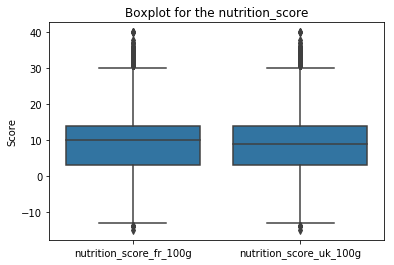

In [100]:
base_color = sb.color_palette()[0]
sb.boxplot(x="variable", y="value", data=nutri_data[nutri_score].melt(),color=base_color)
plt.title("Boxplot for the nutrition_score")
plt.xlabel("")
plt.ylabel("Score")
plt.show()

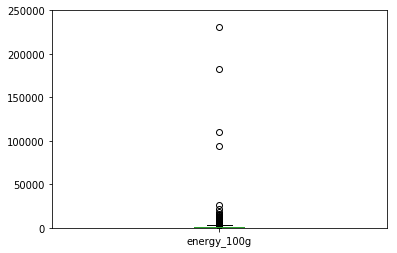

In [101]:
nutri_data['energy_100g'].plot(kind='box')
plt.ylim([0,250000]);

In [102]:
nutri_summary_g = nutri_summary[1:9]

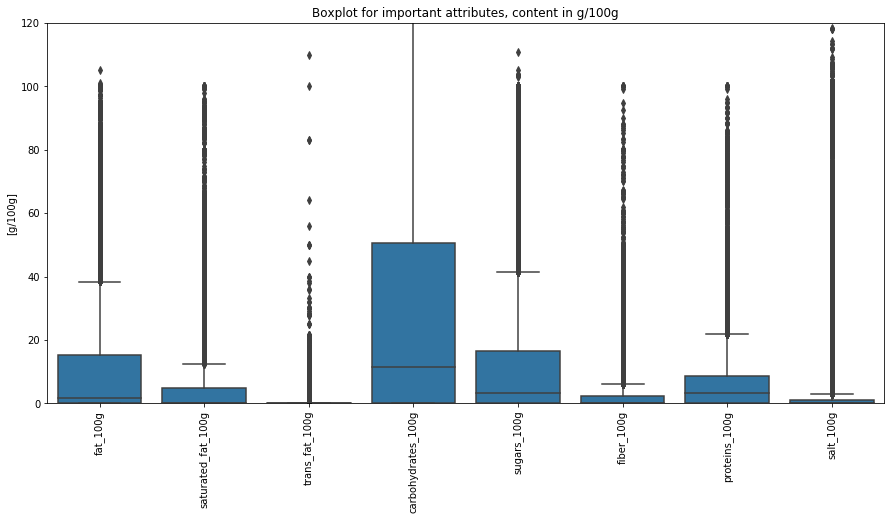

In [103]:
plt.figure(figsize = [15,7])
sb.boxplot(x="variable", y="value", data=nutri_data[nutri_summary_g].melt(),color=base_color)
plt.title("Boxplot for important attributes, content in g/100g")
plt.ylim([0,120])
plt.xlabel("")
plt.ylabel("[g/100g]")
plt.xticks(rotation = 90);
plt.show()

In [104]:
nutri_data['fruits_vegetables_nuts_100g'].describe()

count    302987.000000
mean          0.315120
std           4.477961
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: fruits_vegetables_nuts_100g, dtype: float64

In [105]:
# % of rows of "fruits_vegetalbes_nuts_100g" being equal to 0
(nutri_data.query('fruits_vegetables_nuts_100g==0').code.count()/nutri_data.shape[0])*100

99.31614227673134

> 99% of the rows is 0 => won't be very usefull for the exploration phase 

#### 10. For nutriments in g/100g => number of lines  < 0 or > 100g

> First, for the aliments expressed in g per 100g, let's remove the values, smaller than 0g and bigger than 100g

In [106]:
to_be_cleaned = nutri_data.copy()

#### Define

Check how many lines in **nutri_summary_g** and **nutri_summary_mg** don't respect this criteria. And then delete them.

#### Code

In [107]:
def count_wrong_data(data,list_columns,lim_inf,lim_sup):
    for composant in list_columns:
        # defition of the indicators        
        print(composant)
        criteria = ((data[composant]<lim_inf) | (data[composant]>lim_sup))
        print("Number of outliers")
        print(criteria.sum())

In [108]:
# amount of points outside [0,100]
count_wrong_data(to_be_cleaned ,nutri_summary_g,0,100)

fat_100g
Number of outliers
4
saturated_fat_100g
Number of outliers
3
trans_fat_100g
Number of outliers
9
carbohydrates_100g
Number of outliers
18
sugars_100g
Number of outliers
18
fiber_100g
Number of outliers
5
proteins_100g
Number of outliers
4
salt_100g
Number of outliers
156


In [109]:
# amount of points outside [0,100]
count_wrong_data(to_be_cleaned ,nutri_summary_mg,0,100)

vitamin_a_100g
Number of outliers
1
vitamin_d_100g
Number of outliers
0
vitamin_e_100g
Number of outliers
0
vitamin_k_100g
Number of outliers
0
vitamin_c_100g
Number of outliers
4
vitamin_b1_100g
Number of outliers
1
vitamin_b2_100g
Number of outliers
0
vitamin_pp_100g
Number of outliers
0
vitamin_b6_100g
Number of outliers
0
vitamin_b9_100g
Number of outliers
0
vitamin_b12_100g
Number of outliers
0
calcium_100g
Number of outliers
10
iron_100g
Number of outliers
1
magnesium_100g
Number of outliers
6
potassium_100g
Number of outliers
2
zinc_100g
Number of outliers
0


In [110]:
def data_without_wrong_data(data,list_columns,lim_inf,lim_sup):
    for composant in list_columns:
        # defition of the indicators        
        print(composant)
        criteria = ((data[composant]>=lim_inf) & (data[composant]<=lim_sup))
        clean_data = data[criteria]
        data = clean_data
    return clean_data       

In [111]:
clean_data = data_without_wrong_data(to_be_cleaned,nutri_summary_g,0,100)

fat_100g
saturated_fat_100g
trans_fat_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g


In [112]:
clean_data = data_without_wrong_data(clean_data,nutri_summary_mg,0,100)

vitamin_a_100g
vitamin_d_100g
vitamin_e_100g
vitamin_k_100g
vitamin_c_100g
vitamin_b1_100g
vitamin_b2_100g
vitamin_pp_100g
vitamin_b6_100g
vitamin_b9_100g
vitamin_b12_100g
calcium_100g
iron_100g
magnesium_100g
potassium_100g
zinc_100g


#### Test

In [113]:
clean_data.shape

(302762, 40)

In [114]:
clean_data[nutri_summary_g].describe()

,fat_100g,saturated_fat_100g,trans_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,302762.000000,302762.000000,302762.000000,302762.000000,302762.000000,302762.000000,302762.000000,302762.000000
mean,10.084940,3.824622,0.031734,25.441084,12.758179,1.857429,5.996313,1.327555
std,16.418229,7.187823,0.650585,29.043519,19.973317,3.952889,7.932875,5.745464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.700000,0.200000,0.000000,11.500000,3.330000,0.000000,3.330000,0.250000
75%,15.380000,5.000000,0.000000,50.600000,16.600000,2.400000,8.700000,1.178560
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [115]:
clean_data[nutri_summary_mg].describe()

,vitamin_a_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,vitamin_b12_100g,calcium_100g,iron_100g,magnesium_100g,potassium_100g,zinc_100g
count,302762.000000,3.027620e+05,302762.000000,302762.000000,302762.000000,302762.000000,302762.000000,302762.000000,302762.000000,302762.000000,302762.000000,302762.000000,302762.000000,302762.000000,302762.000000,302762.000000
mean,0.000180,1.849958e-07,0.000241,0.000104,0.006694,0.011456,0.009245,0.000560,0.000386,0.000119,0.000002,0.047375,0.001637,0.002837,0.026462,0.000103
std,0.049393,5.491186e-05,0.046103,0.056794,0.313882,0.379051,0.246074,0.053068,0.168448,0.044098,0.000730,0.402504,0.144770,0.137774,0.316931,0.009264
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028000,0.000850,0.000000,0.000000,0.000000
max,26.700000,3.000000e-02,15.100000,31.250000,100.000000,92.600000,42.500000,21.428571,92.600000,23.076923,0.400000,99.006000,50.000000,39.500000,66.667000,4.000000


In [116]:
# amount of points outside 
count_wrong_data(clean_data,nutri_summary_g,0,100)

fat_100g
Number of outliers
0
saturated_fat_100g
Number of outliers
0
trans_fat_100g
Number of outliers
0
carbohydrates_100g
Number of outliers
0
sugars_100g
Number of outliers
0
fiber_100g
Number of outliers
0
proteins_100g
Number of outliers
0
salt_100g
Number of outliers
0


In [117]:
# amount of points outside 
count_wrong_data(clean_data,nutri_summary_mg,0,100)

vitamin_a_100g
Number of outliers
0
vitamin_d_100g
Number of outliers
0
vitamin_e_100g
Number of outliers
0
vitamin_k_100g
Number of outliers
0
vitamin_c_100g
Number of outliers
0
vitamin_b1_100g
Number of outliers
0
vitamin_b2_100g
Number of outliers
0
vitamin_pp_100g
Number of outliers
0
vitamin_b6_100g
Number of outliers
0
vitamin_b9_100g
Number of outliers
0
vitamin_b12_100g
Number of outliers
0
calcium_100g
Number of outliers
0
iron_100g
Number of outliers
0
magnesium_100g
Number of outliers
0
potassium_100g
Number of outliers
0
zinc_100g
Number of outliers
0


#### 11. For nutriments in g/100g => number of lines  > (Q3 + 1.5 * IQR)

In [118]:
def count_outliers(data,list_columns):
    for composant in list_columns:
        # defition of the indicators
        max_comp = data[composant].max()
        qtiles_1_3 = list(data[composant].quantile([0.25,0.75]))
        inter_qt = (qtiles_1_3[1]-qtiles_1_3[0])
        max_IQR = qtiles_1_3[1] + 1.5*inter_qt
        lim_sup = min(max_comp,max_IQR)
        
        tot_length = data.shape[0]
        print(composant.upper())
        print(max_IQR)
        criteria = (data[composant]> lim_sup)
        print("Number of outliers")
        print(criteria.sum())   
        print("% of outliers vs length data")
        print((criteria.sum()/tot_length)*100)
        print("")

In [119]:
def count_outliers_INF(data,list_columns):
    for composant in list_columns:
        # defition of the indicators
        min_comp = data[composant].min()
        qtiles_1_3 = list(data[composant].quantile([0.25,0.75]))
        inter_qt = (qtiles_1_3[1]-qtiles_1_3[0])
        min_IQR = qtiles_1_3[0] - 1.5*inter_qt
        lim_inf = max(min_comp,min_IQR)
        
        tot_length = data.shape[0]
        print(composant.upper())
        print(min_IQR)
        criteria = (data[composant]< lim_inf)
        print("Number of outliers")
        print(criteria.sum())   
        print("% of outliers vs length data")
        print((criteria.sum()/tot_length)*100)
        print("")

In [120]:
count_outliers(clean_data,nutri_summary_g)

FAT_100G
38.45
Number of outliers
17329
% of outliers vs length data
5.723637708827396

SATURATED_FAT_100G
12.5
Number of outliers
31806
% of outliers vs length data
10.505281376130426

TRANS_FAT_100G
0.0
Number of outliers
2987
% of outliers vs length data
0.9865835210495373

CARBOHYDRATES_100G
126.5
Number of outliers
0
% of outliers vs length data
0.0

SUGARS_100G
41.5
Number of outliers
33308
% of outliers vs length data
11.001380622403076

FIBER_100G
6.0
Number of outliers
29308
% of outliers vs length data
9.680210858694288

PROTEINS_100G
21.75
Number of outliers
16494
% of outliers vs length data
5.447843520653187

SALT_100G
2.9464
Number of outliers
19410
% of outliers vs length data
6.410976278396893



In [121]:
count_outliers(clean_data,nutri_summary_mg)

VITAMIN_A_100G
0.0
Number of outliers
58832
% of outliers vs length data
19.431764884628848

VITAMIN_D_100G
0.0
Number of outliers
6661
% of outliers vs length data
2.200077949016059

VITAMIN_E_100G
0.0
Number of outliers
1263
% of outliers vs length data
0.4171593528910497

VITAMIN_K_100G
0.0
Number of outliers
857
% of outliers vs length data
0.2830606218746078

VITAMIN_C_100G
0.0
Number of outliers
50228
% of outliers vs length data
16.589928722891248

VITAMIN_B1_100G
0.0
Number of outliers
10762
% of outliers vs length data
3.5546072492584937

VITAMIN_B2_100G
0.0
Number of outliers
10399
% of outliers vs length data
3.4347110932019214

VITAMIN_PP_100G
0.0
Number of outliers
11424
% of outliers vs length data
3.773260845152298

VITAMIN_B6_100G
0.0
Number of outliers
6584
% of outliers vs length data
2.174645431064665

VITAMIN_B9_100G
0.0
Number of outliers
5179
% of outliers vs length data
1.710584551561953

VITAMIN_B12_100G
0.0
Number of outliers
5140
% of outliers vs length data
1

#### 12. Outliers for energy_100g

In [138]:
# compute the Q3 + 1.5*Interquartile and amount of observations above for non zero energy
count_outliers(clean_data.query('energy_100g !=0'),["energy_100g"])

ENERGY_100G
3558.0
Number of outliers
1104
% of outliers vs length data
0.45411728895269204



##### Define

Seen the amount of outliers above Q3 + 1.5*Interquartile, we decide to delete them

##### Code

In [139]:
clean_data = clean_data.query('energy_100g < 3558')

##### Test

In [140]:
clean_data[clean_data["energy_100g"]>3558].code.count()

0

#### 13. Outliers for nutrition-score-fr_100g and for nutrition-score-fr_100g

In [143]:
count_outliers(clean_data,["nutrition_score_fr_100g","nutrition_score_uk_100g"])

NUTRITION_SCORE_FR_100G
30.5
Number of outliers
0
% of outliers vs length data
0.0

NUTRITION_SCORE_UK_100G
30.5
Number of outliers
0
% of outliers vs length data
0.0



In [144]:
count_outliers_INF(clean_data,nutri_score)

NUTRITION_SCORE_FR_100G
-13.5
Number of outliers
0
% of outliers vs length data
0.0

NUTRITION_SCORE_UK_100G
-13.5
Number of outliers
0
% of outliers vs length data
0.0



##### Define

We'll delete the outliers (< -13.5 or > 30.5)

##### Code

In [145]:
clean_data = clean_data.query('(nutrition_score_fr_100g > -13.5)  and (nutrition_score_fr_100g < 30.5)')

##### Test

In [146]:
clean_data.query('(nutrition_score_fr_100g < -13.5)  or (nutrition_score_fr_100g > 30.5)').code.count()

0

In [147]:
clean_data.query('(nutrition_score_uk_100g < -13.5)  or (nutrition_score_uk_100g > 30.5)').code.count()

0

#### 14. Delete rows containing more 0.8g of Calcium, Iron or Vitamines

##### Define

Delete rows having an aberrant value > 0.8

##### Code

In [148]:
def data_smaller_Xg(data,list_columns,lim_sup):
    for composant in list_columns:
        # defition of the indicators        
        print(composant)
        criteria = (data[composant]< lim_sup)
        clean_data = data[criteria]
        data = clean_data
    return clean_data  

In [149]:
cleaned_headers = clean_data.columns.values.tolist()
vitamines = [i for i in cleaned_headers if i.startswith("vitamin_")]

In [150]:
print(cleaned_headers)

['code', 'product_name', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin_a_100g', 'vitamin_d_100g', 'vitamin_e_100g', 'vitamin_k_100g', 'vitamin_c_100g', 'vitamin_b1_100g', 'vitamin_b2_100g', 'vitamin_pp_100g', 'vitamin_b6_100g', 'vitamin_b9_100g', 'vitamin_b12_100g', 'calcium_100g', 'iron_100g', 'magnesium_100g', 'potassium_100g', 'zinc_100g', 'lactose_100g', 'omega_3_fat_100g', 'omega_6_fat_100g', 'omega_9_fat_100g', 'cholesterol_100g', 'alcohol_100g', 'caffeine_100g', 'fruits_vegetables_nuts_100g', 'nutrition_grade_fr', 'nutrition_score_fr_100g', 'nutrition_score_uk_100g', 'nulls_grade_fr']


In [151]:
# start with ['calcium_100g','iron_100g','magnesium_100g', 'potassium_100g', 'zinc_100g']
clean_data = data_smaller_Xg(clean_data,['calcium_100g','iron_100g','magnesium_100g', 'potassium_100g', 'zinc_100g'],0.8)

calcium_100g
iron_100g
magnesium_100g
potassium_100g
zinc_100g


In [152]:
# now for the Vitamines
clean_data = data_smaller_Xg(clean_data,vitamines,0.8)

vitamin_a_100g
vitamin_d_100g
vitamin_e_100g
vitamin_k_100g
vitamin_c_100g
vitamin_b1_100g
vitamin_b2_100g
vitamin_pp_100g
vitamin_b6_100g
vitamin_b9_100g
vitamin_b12_100g


In [153]:
clean_data.shape

(295693, 40)

<a id='exporting'></a>
### Exporting Cleaned data in csv
<a href="#table">Back to table of content</a>

In [154]:
clean_data.to_csv('clean_nutri_data.csv', encoding='utf_8', index=False)

In [103]:
#test_csv = pd.read_csv('clean_nutri_data.csv', sep=",", encoding='utf_8', low_memory=False)